# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces



El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

# Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

# Estructura del proyecto

**Paso 1: Objetivo del Proyecto**
1. ¿Que se quiere conseguir y por qué?
2. ¿ A quién le interesa lo que produces?
3. ¿Que decisiones tomar de acuerdo al análisis?


**Paso 2: Preprocesamiento de los datos**

1. Cargar librerías y datasets
2. Explorar valores duplicados
3. Explorar valores ausentes
   1. Reemplazar valores ausentes
4. Convertir tipos de datos

**Paso 3: Análisis exploratorio de datos**

1. Resumen estadístico: Obtener estadísticas descriptivas de las columnas numéricas.
2. Distribución de llamadas: Analizar la distribución de llamadas entrantes y salientes.
3. Análisis de llamadas perdidas: Ver cuántas llamadas se perdieron y su proporción.
4. Duración de llamadas: Analizar la duración de las llamadas y los tiempos de espera.
5. Análisis del número de llamadas salientes por operador: Comparar las métricas de rendimiento entre los diferentes operadores.

**Paso 4: Identificar operadores ineficaces**

1. Comparar las métricas de rendimiento entre los diferentes operadores.
    1. Porcentaje de llamadas perdidas por operador.
    2. Tiempo promedio de espera por operador.
    3. Número de llamadas salientes por operador.
2. Definir un criterio para crear un ranking de los operadores ineficaces

**Paso 5: Pruebas de Hipótesis**

1. Hipotesis 1: Diferencias rendimiento de los operadores en función de las métricas de eficacia porcentaje de llamadas perdidas.
2. Hipotesis 2: Diferencias en el rendimiento de los operadores en función de las métricas de eficacia tiempo de espera.

**Paso 6: Conclusiones y recomendaciones**

**Paso 7: Elaborar una presentación**

1. Preparar una presentación en formato PDF con visualizaciones mas importantes del análisis.
 

## Objetivo del Proyecto

1. ¿Qué quieres conseguir y por qué?

    El objetivo principal es identificar a los operadores ineficaces en el servicio de telefonía virtual CallMeMaybe. Esto incluye analizar las llamadas entrantes perdidas, el tiempo de espera prolongado para las llamadas entrantes y la baja cantidad de llamadas salientes realizadas por los operadores. La razón detrás de este análisis es mejorar la eficiencia del servicio al permitir que los supervisores tomen decisiones informadas para la capacitación, reubicación o posible reemplazo de operadores que no cumplen con los estándares de desempeño. Esto, a su vez, podría mejorar la satisfacción del cliente y la calidad del servicio.

2. ¿Quienes son los interesados?

    Los resultados de este análisis son relevantes para varios grupos:

    - Supervisores y gerentes de operaciones: Necesitan entender el desempeño de los operadores para optimizar la asignación de recursos y mejorar la eficiencia del equipo.
    - Recursos humanos: Podrían utilizar esta información para la planificación de capacitaciones o evaluaciones de desempeño.
    - Clientes de CallMeMaybe: La mejora en el servicio podría resultar en una experiencia más satisfactoria para ellos.
    - Accionistas y directivos de la empresa: Están interesados en los resultados financieros y la eficiencia operativa.
      
3. ¿Qué decisiones se tomarán de acuerdo a tu análisis?

    Las decisiones podrían incluir:

    - Capacitación: Implementar programas de capacitación para los operadores identificados como ineficaces para mejorar sus habilidades y eficiencia.

    - Reasignación de recursos: Cambiar la distribución de llamadas entre operadores para asegurar que los operadores más eficaces manejen más llamadas.

    - Contrataciones: Considerar la contratación de nuevos operadores si se identifica que la carga de trabajo es demasiado alta para los operadores actuales.

    - Políticas de incentivos:** Introducir incentivos para operadores que demuestren un buen desempeño y mejoren en métricas clave.

## Preprocesamiento de datos

**Importar librerías necesarias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


**Cargar datasets y visualizar una parte de este**

In [2]:
#Cargar los datos

operators = pd.read_csv('/datasets/telecom_dataset_us.csv', sep=',')

operators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [3]:
operators.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [4]:
#Cargar los datos

clients = pd.read_csv('/datasets/telecom_clients_us.csv', sep=',')

clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [5]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


**Estudiar valores duplicados**

In [6]:
# 2. Estudiar valores duplicados
print("\nDuplicados en el dataset de operadores:")
print(operators.duplicated().sum())

print("\nDuplicados en el dataset de clientes:")
print(clients.duplicated().sum())


Duplicados en el dataset de operadores:
4900

Duplicados en el dataset de clientes:
0


In [7]:
# Eliminar valores duplicados en el dataset de operadores
operators_before = operators.shape[0]  # Número de filas antes de eliminar duplicados
operators = operators.drop_duplicates()
operators_after = operators.shape[0]  # Número de filas después de eliminar duplicados

# Imprimir el número de filas eliminadas
print(f"Número de filas antes de eliminar duplicados: {operators_before}")
print(f"Número de filas después de eliminar duplicados: {operators_after}")

Número de filas antes de eliminar duplicados: 53902
Número de filas después de eliminar duplicados: 49002


**Estudiar valores ausentes**

In [8]:
# 1. Estudiar valores ausentes
print("Valores ausentes en el dataset de operadores:")
print(operators.isnull().sum())

print("\nValores ausentes en el dataset de clientes:")
print(clients.isnull().sum())

Valores ausentes en el dataset de operadores:
user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Valores ausentes en el dataset de clientes:
user_id        0
tariff_plan    0
date_start     0
dtype: int64


Dado que hay 7456 valores ausentes, lo más recomendable es eliminar esas filas, especialmente si operator_id es un campo clave para el análisis sobre la eficacia de los operadores. Esto asegurará que los análisis posteriores se basen en datos completos y coherentes.

In [9]:
# Tratar valores ausentes
# Para el dataset de operadores, podemos decidir cómo manejar los valores ausentes
# Para 'operator_id', eliminaremos filas donde sea NaN
operators.dropna(subset=['operator_id'], inplace=True)

# Para 'internal', rellenaremos con un valor 'unknown'
operators['internal'].fillna('unknown', inplace=True)

# Comprobar de nuevo los valores ausentes
print("\nValores ausentes después del preprocesamiento en el dataset de operadores:")
print(operators.isnull().sum())


Valores ausentes después del preprocesamiento en el dataset de operadores:
user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


**Corregir Tipos de datos necesarios**

In [10]:
# 3. Corregir el formato de la fecha
operators['date'] = pd.to_datetime(operators['date'], errors='coerce')
clients['date_start'] = pd.to_datetime(clients['date_start'], errors='coerce')

# Verificar que las fechas se hayan convertido correctamente
print("\nTipos de datos después de la conversión:")
print(operators.dtypes)
print(clients.dtypes)


Tipos de datos después de la conversión:
user_id                                                int64
date                   datetime64[ns, pytz.FixedOffset(180)]
direction                                             object
internal                                              object
operator_id                                          float64
is_missed_call                                          bool
calls_count                                            int64
call_duration                                          int64
total_call_duration                                    int64
dtype: object
user_id                 int64
tariff_plan            object
date_start     datetime64[ns]
dtype: object


## Análisis Exploratorio de Datos

**Resumen estadístico:** Obtener estadísticas descriptivas de las columnas numéricas.

In [11]:
# 1. Descriptivo de los Datos
print(operators.describe())


             user_id    operator_id   calls_count  call_duration  \
count   41546.000000   41546.000000  41546.000000   41546.000000   
mean   167301.311992  916523.315409     16.900424    1009.769172   
std       600.418838   21230.041008     59.749373    4064.106117   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166782.000000  900790.500000      1.000000       0.000000   
50%    167175.000000  913938.000000      4.000000     106.000000   
75%    167827.000000  937708.000000     13.000000     770.000000   
max    168606.000000  973286.000000   4817.000000  144395.000000   

       total_call_duration  
count         41546.000000  
mean           1321.592813  
std            4785.978633  
min               0.000000  
25%              67.000000  
50%             288.000000  
75%            1104.000000  
max          166155.000000  


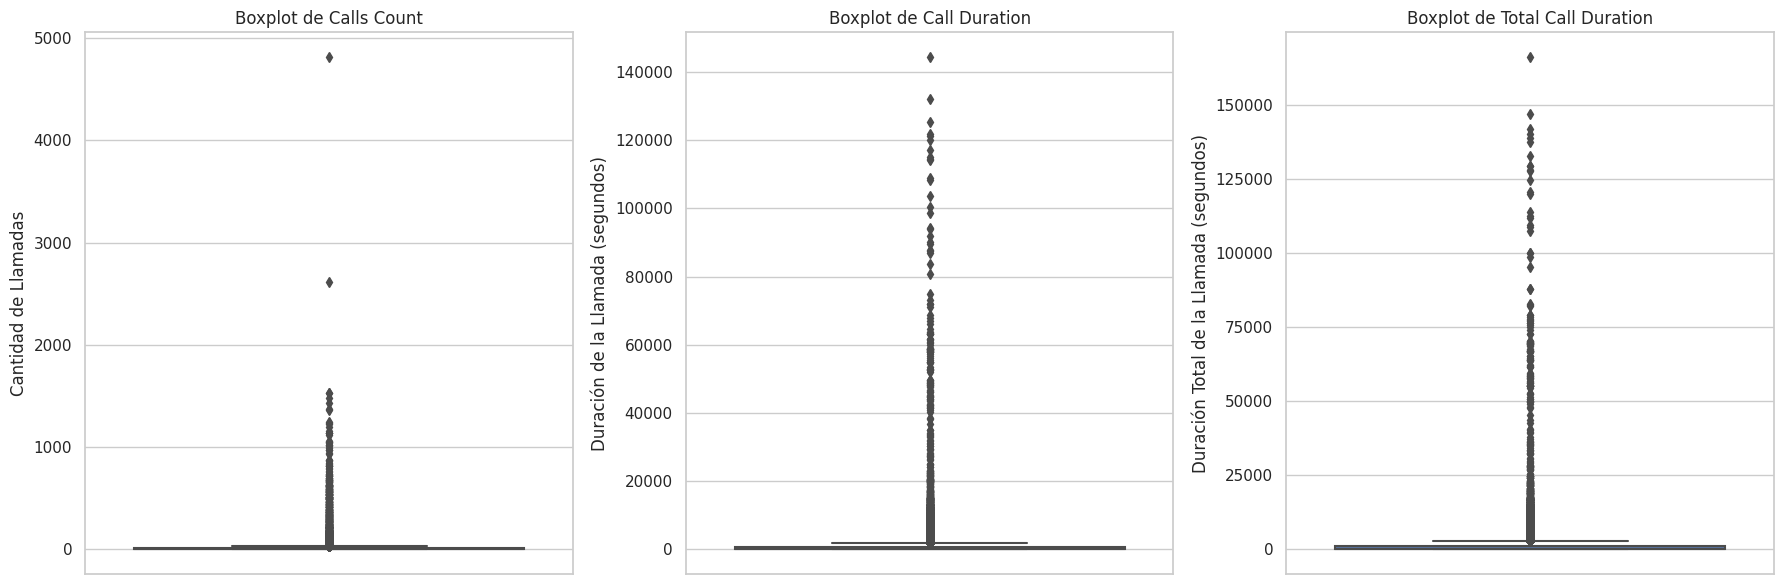

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con subgráficos
plt.figure(figsize=(18, 6))

# Boxplot para calls_count
plt.subplot(1, 3, 1)
sns.boxplot(y=operators['calls_count'])
plt.title('Boxplot de Calls Count')
plt.ylabel('Cantidad de Llamadas')

# Boxplot para call_duration
plt.subplot(1, 3, 2)
sns.boxplot(y=operators['call_duration'])
plt.title('Boxplot de Call Duration')
plt.ylabel('Duración de la Llamada (segundos)')

# Boxplot para total_call_duration
plt.subplot(1, 3, 3)
sns.boxplot(y=operators['total_call_duration'])
plt.title('Boxplot de Total Call Duration')
plt.ylabel('Duración Total de la Llamada (segundos)')

# Ajustar el layout
plt.tight_layout()
plt.show()

calls_count: El promedio de llamadas por operador es aproximadamente 16.9, con un mínimo de 1 y un máximo de 4817. Esto sugiere que algunos operadores manejan muchas más llamadas que otros. La desviación estándar de 59.75 indica una gran variabilidad en la carga de trabajo entre los operadores.
La mayoría de los operadores parece manejar un número relativamente bajo de llamadas, dado que el 25% de los operadores tienen un conteo de llamadas de 1.

call_duration: La duración media de las llamadas es de aproximadamente 1009.77 segundos (alrededor de 16 minutos), con un máximo muy alto de 144395 segundos (aproximadamente 40 horas). Esto sugiere que algunas llamadas son excepcionalmente largas, lo cual podría ser un punto a investigar más a fondo.
La desviación estándar es alta (4064.11), indicando que hay una gran variabilidad en la duración de las llamadas. Es posible que haya un pequeño número de llamadas muy largas que estén afectando el promedio.

total_call_duration: La duración total de las llamadas (incluyendo el tiempo de espera) tiene un promedio de 1321.59 segundos, lo que también refleja la variabilidad en el uso del tiempo de los operadores.
El máximo de 166155 segundos indica que hay operadores que están acumulando mucho tiempo de llamada, lo que podría estar relacionado con su efectividad o, en algunos casos, ineficacia si hay muchas llamadas perdidas asociadas.

Ineficiencia Potencial: La alta variabilidad en calls_count y call_duration sugiere que algunos operadores podrían estar sobrecargados o subutilizados. Esto podría contribuir a un aumento en las llamadas perdidas o a un tiempo de espera prolongado.

Investigación Adicional: Podría ser útil investigar a fondo los operadores que tienen un alto número de llamadas y una duración media de llamadas más larga para determinar si están manejando eficientemente sus tareas o si son ineficaces debido a un alto número de llamadas perdidas.

**Analisis de llamadas perdidas**

In [13]:
# Análisis de Llamadas Perdidas
total_calls = operators['calls_count'].sum()
missed_calls = operators[operators['is_missed_call']].shape[0]
missed_calls_proportion = missed_calls / operators.shape[0]

print(f"\nTotal de llamadas: {total_calls}")
print(f"Llamadas perdidas: {missed_calls}")
print(f"Proporción de llamadas perdidas: {missed_calls_proportion:.2%}")


Total de llamadas: 702145
Llamadas perdidas: 14110
Proporción de llamadas perdidas: 33.96%


La proporción de llamadas perdidas es del 33.96%. Esto significa que aproximadamente un tercio de las llamadas entrantes no se atendieron. Esta es una tasa bastante alta y podría ser motivo de preocupación para el servicio.

Una alta proporción de llamadas perdidas puede indicar que los clientes no están recibiendo la atención que necesitan. Esto podría llevar a la insatisfacción del cliente, que puede impactar en la retención y en la reputación de la empresa.

Es importante investigar por qué hay tantas llamadas perdidas. Esto podría ser un signo de que:

- Hay un número insuficiente de operadores disponibles para atender las llamadas.
- Los operadores pueden estar abrumados, lo que causa que se pierdan llamadas.
- Pueden existir problemas en el sistema de gestión de llamadas que impiden que las llamadas sean dirigidas correctamente.

In [14]:
# Calcular total de llamadas y llamadas perdidas por operador
operator_performance = operators.groupby('operator_id').agg(
    Total_Llamadas_Peridas=('is_missed_call', 'sum'),
    Total_Llamadas=('calls_count', 'sum')
).reset_index()

# Calcular el porcentaje de llamadas perdidas
operator_performance['Porcentaje_Llamadas_Perdidas'] = (operator_performance['Total_Llamadas_Peridas'] / operator_performance['Total_Llamadas']) * 100


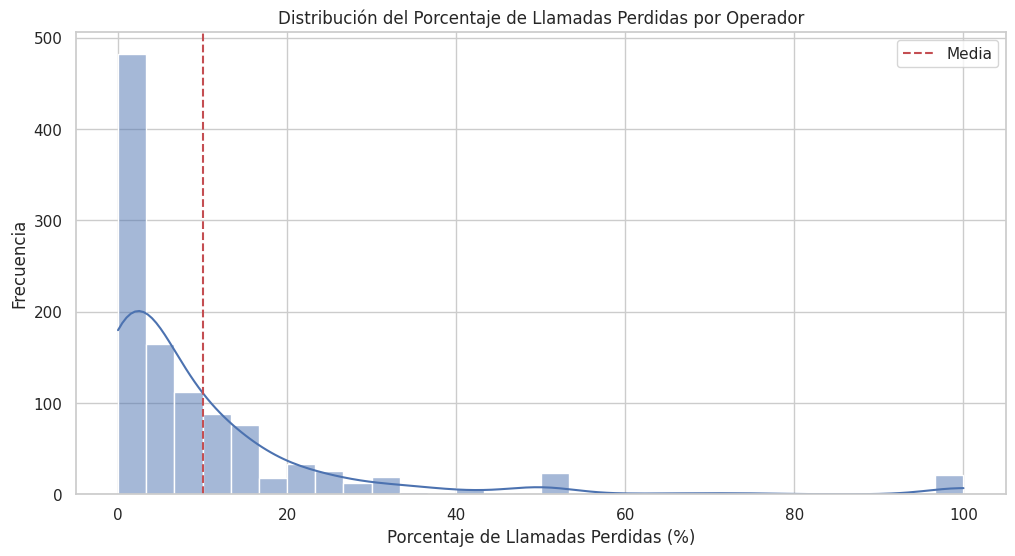

In [15]:
# Visualizar la distribución del porcentaje de llamadas perdidas por todos los operadores
plt.figure(figsize=(12, 6))
sns.histplot(operator_performance['Porcentaje_Llamadas_Perdidas'], bins=30, kde=True)
plt.title('Distribución del Porcentaje de Llamadas Perdidas por Operador')
plt.xlabel('Porcentaje de Llamadas Perdidas (%)')
plt.ylabel('Frecuencia')
plt.axvline(x=operator_performance['Porcentaje_Llamadas_Perdidas'].mean(), color='r', linestyle='--', label='Media')
plt.legend()
plt.show()

In [16]:
porcentaje_descripcion = operator_performance['Porcentaje_Llamadas_Perdidas'].describe()

# Mostrar el resumen estadístico
print("\nResumen estadístico del porcentaje de llamadas perdidas por operador:")
print(porcentaje_descripcion)


Resumen estadístico del porcentaje de llamadas perdidas por operador:
count    1092.000000
mean       10.110073
std        16.885686
min         0.000000
25%         0.830640
50%         4.365317
75%        12.102884
max       100.000000
Name: Porcentaje_Llamadas_Perdidas, dtype: float64


Cantidad de operadores: 1092: Hay 1092 operadores en el conjunto de datos que tienen información sobre el porcentaje de llamadas perdidas.

Media: 10.11%: En promedio, los operadores pierden aproximadamente el 10.11% de sus llamadas. Esto indica un nivel considerable de ineficiencia que puede necesitar atención.

Desviación estándar: 16.89%: Hay una alta variabilidad en el porcentaje de llamadas perdidas. Esto sugiere que algunos operadores pueden estar perdiendo un porcentaje significativamente mayor de llamadas que otros.

Min (Mínimo): 0.00%: Al menos un operador no ha perdido ninguna llamada, lo cual es un dato positivo.

Percentil 25: 0.83%: El 25% de los operadores tiene un porcentaje de llamadas perdidas menor o igual al 0.83%. Esto indica que una parte de los operadores es bastante eficiente.

50% (Mediana): 4.37%: La mediana indica que el 50% de los operadores tiene un porcentaje de llamadas perdidas de 4.37% o menos. Esto refuerza que muchos operadores están por debajo del promedio.

Max (Máximo): 100.00%: Existe al menos un operador que ha perdido el 100% de sus llamadas, lo que indica una situación extrema de ineficacia que definitivamente necesita ser abordada.

Conclusiones

Ineficiencia general: Un promedio del 10.11% y una desviación estándar alta sugieren que hay una diversidad significativa en la eficacia de los operadores.

Necesidad de intervención: Los operadores que pierden un alto porcentaje de llamadas (especialmente aquellos cercanos al 100%) deberían ser el foco de las acciones correctivas, como capacitación o cambios en la asignación de tareas.

**Análisis de tiempo de espera promedio por operador**

Para calcular el tiempo de espera promedio por operador, primero debemos definir el tiempo de espera. El tiempo de espera se puede obtener restando call_duration de total_call_duration para las llamadas entrantes. Luego, agruparemos los datos por operador y calcularemos el tiempo de espera promedio.

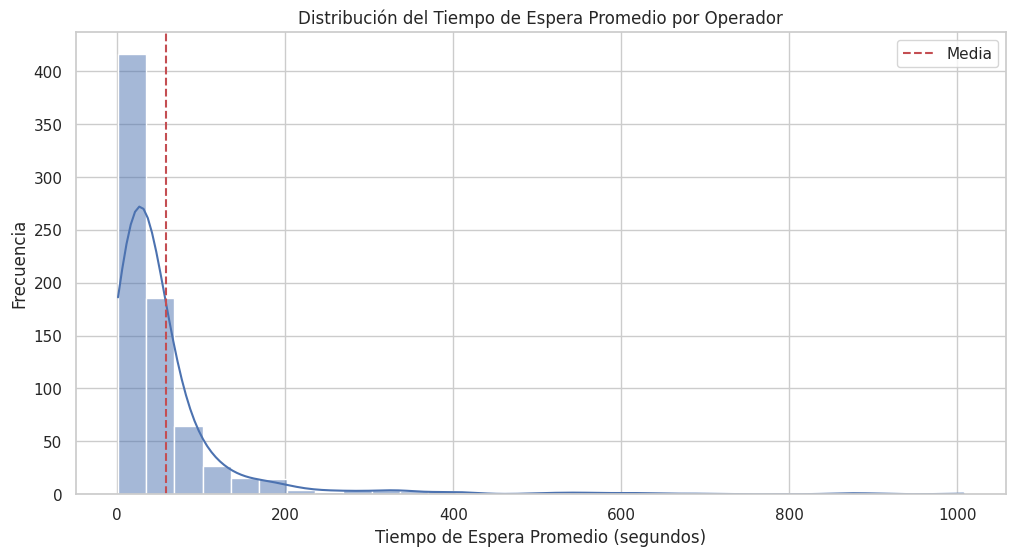


Tiempo de espera promedio por operador:
   operator_id  Tiempo de Espera Promedio (segundos)
0     879896.0                             27.333333
1     879898.0                             29.473684
2     880020.0                              7.714286
3     880022.0                             14.000000
4     880026.0                              7.944444


In [17]:
# Calcular el tiempo de espera
operators['waiting_time'] = operators['total_call_duration'] - operators['call_duration']

# Filtrar solo las llamadas entrantes
incoming_calls = operators[operators['direction'] == 'in']

# Calcular el tiempo de espera promedio por operador
waiting_time_per_operator = incoming_calls.groupby('operator_id')['waiting_time'].mean().reset_index()

# Renombrar la columna para mayor claridad
waiting_time_per_operator.rename(columns={'waiting_time': 'Tiempo de Espera Promedio (segundos)'}, inplace=True)

# Visualizar la distribución del tiempo de espera promedio por operador
plt.figure(figsize=(12, 6))
sns.histplot(waiting_time_per_operator['Tiempo de Espera Promedio (segundos)'], bins=30, kde=True)
plt.title('Distribución del Tiempo de Espera Promedio por Operador')
plt.xlabel('Tiempo de Espera Promedio (segundos)')
plt.ylabel('Frecuencia')
plt.axvline(x=waiting_time_per_operator['Tiempo de Espera Promedio (segundos)'].mean(), color='r', linestyle='--', label='Media')
plt.legend()
plt.show()

# Mostrar el tiempo de espera promedio por operador
print("\nTiempo de espera promedio por operador:")
print(waiting_time_per_operator.head())


Resumen estadístico del tiempo de espera promedio por operador:
count     754.000000
mean       57.612807
std        94.456737
min         1.000000
25%        17.500000
50%        31.000000
75%        58.000000
max      1007.375000
Name: Tiempo de Espera Promedio (segundos), dtype: float64


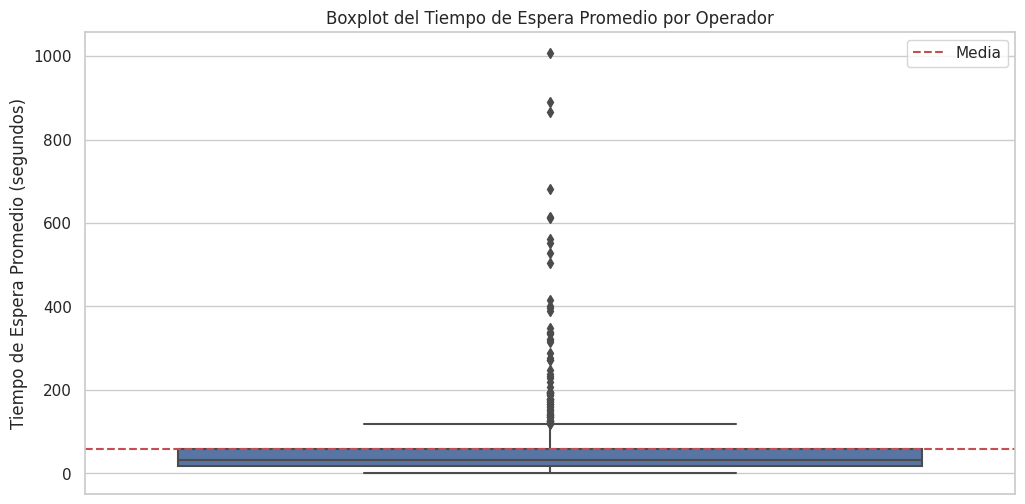

In [18]:
# Describir el tiempo de espera promedio por operador
waiting_time_description = waiting_time_per_operator['Tiempo de Espera Promedio (segundos)'].describe()

# Mostrar el resumen estadístico
print("\nResumen estadístico del tiempo de espera promedio por operador:")
print(waiting_time_description)

# Boxplot del tiempo de espera promedio por operador
plt.figure(figsize=(12, 6))
sns.boxplot(data=waiting_time_per_operator, y='Tiempo de Espera Promedio (segundos)')
plt.title('Boxplot del Tiempo de Espera Promedio por Operador')
plt.ylabel('Tiempo de Espera Promedio (segundos)')
plt.axhline(y=waiting_time_per_operator['Tiempo de Espera Promedio (segundos)'].mean(), color='r', linestyle='--', label='Media')
plt.legend()
plt.show()

Count: 754: Hay 754 operadores que tienen datos sobre el tiempo de espera promedio, lo que indica una muestra significativa.

Mean (Media):57.61 segundos: En promedio, los operadores tienen un tiempo de espera de aproximadamente 57.61 segundos. Este tiempo podría considerarse elevado, dependiendo del contexto del servicio al cliente.

Desviación estándar: 94.46 segundos: La alta desviación estándar sugiere que hay una gran variabilidad en los tiempos de espera. Algunos operadores tienen tiempos de espera mucho más largos que otros.

Min (Mínimo): 1 segundo: Al menos un operador tiene un tiempo de espera muy corto, lo que podría indicar eficiencia en el manejo de llamadas.

25% (Percentil 25): 17.50 segundos: El 25% de los operadores tiene un tiempo de espera de 17.5 segundos o menos, indicando que hay un grupo de operadores que son bastante eficientes.

50% (Mediana): 31 segundos: La mediana indica que el 50% de los operadores tiene un tiempo de espera de 31 segundos o menos. Esto muestra que la mitad de los operadores manejan las llamadas de manera relativamente rápida.

75% (Percentil 75): 58 segundos: El 75% de los operadores tiene un tiempo de espera de 58 segundos o menos. Esto significa que muchos operadores están en el límite del tiempo de espera promedio, lo que podría ser preocupante.

Max (Máximo): 1007.38 segundos: Existe al menos un operador que tiene un tiempo de espera muy alto, superando los 1000 segundos (aproximadamente 16.8 minutos), lo que es un indicativo de ineficacia que necesita ser abordado.

Conclusiones

Ineficiencia en algunos operadores: La media de 57.61 segundos, junto con un máximo de más de 1000 segundos, sugiere que algunos operadores están experimentando tiempos de espera excesivamente largos, lo que puede afectar la satisfacción del cliente.

Variabilidad en el rendimiento: La alta desviación estándar indica que hay una gran variación en el rendimiento entre los operadores, lo que sugiere que algunos están manejando las llamadas de manera mucho más eficiente que otros.

Identificación de operadores problemáticos: Los operadores con tiempos de espera por encima del promedio y aquellos cercanos al máximo deberían ser el foco de un análisis más detallado y potencialmente de medidas correctivas.

**Análisis de llamadas salientes por operador**

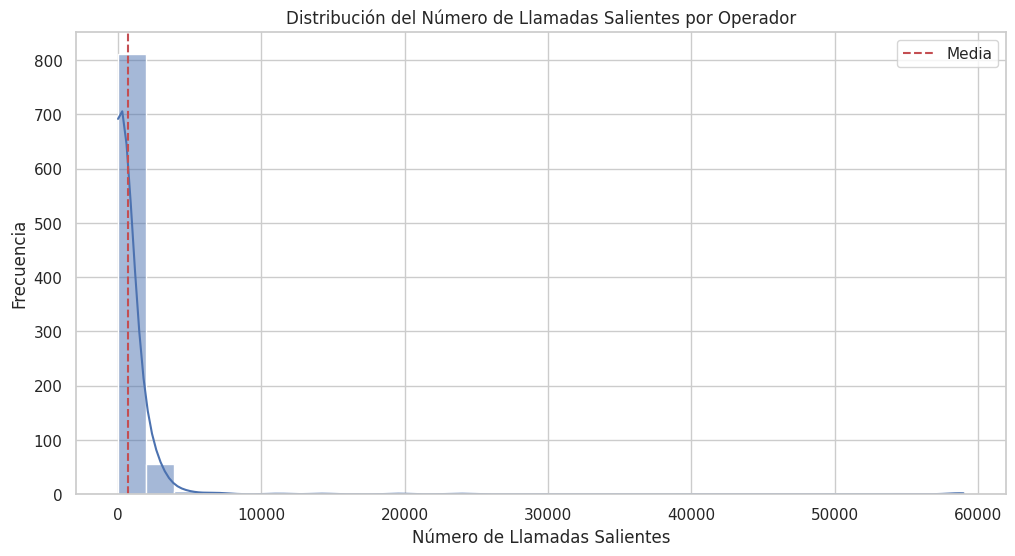


Número de llamadas salientes por operador (primeras filas):
   operator_id  Número de Llamadas Salientes
0     879896.0                           872
1     879898.0                          7209
2     880020.0                            38
3     880022.0                           189
4     880026.0                          2208


In [19]:
# Filtrar solo las llamadas salientes
outgoing_calls = operators[operators['direction'] == 'out']

# Calcular el número de llamadas salientes por operador
outgoing_calls_per_operator = outgoing_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Renombrar la columna para mayor claridad
outgoing_calls_per_operator.rename(columns={'calls_count': 'Número de Llamadas Salientes'}, inplace=True)

# Visualizar la distribución del número de llamadas salientes por operador
plt.figure(figsize=(12, 6))
sns.histplot(outgoing_calls_per_operator['Número de Llamadas Salientes'], bins=30, kde=True)
plt.title('Distribución del Número de Llamadas Salientes por Operador')
plt.xlabel('Número de Llamadas Salientes')
plt.ylabel('Frecuencia')
plt.axvline(x=outgoing_calls_per_operator['Número de Llamadas Salientes'].mean(), color='r', linestyle='--', label='Media')
plt.legend()
plt.show()

# Mostrar el número de llamadas salientes por operador
print("\nNúmero de llamadas salientes por operador (primeras filas):")
print(outgoing_calls_per_operator.head())


Resumen estadístico del número de llamadas salientes por operador:
count      882.000000
mean       689.731293
std       3122.953946
min          1.000000
25%         11.000000
50%         90.000000
75%        597.250000
max      58977.000000
Name: Número de Llamadas Salientes, dtype: float64


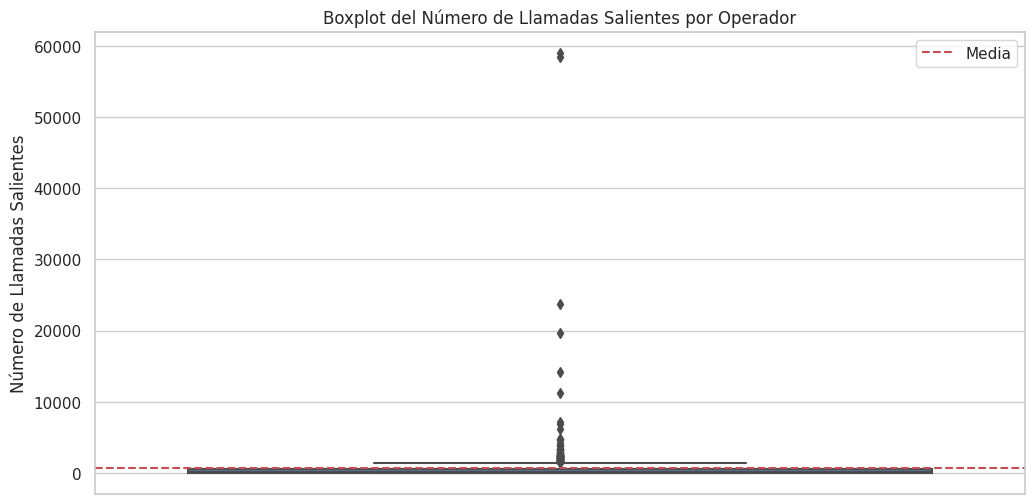

In [20]:
# Describir el número de llamadas salientes por operador
outgoing_calls_description = outgoing_calls_per_operator['Número de Llamadas Salientes'].describe()

# Mostrar el resumen estadístico
print("\nResumen estadístico del número de llamadas salientes por operador:")
print(outgoing_calls_description)

# Boxplot del número de llamadas salientes por operador
plt.figure(figsize=(12, 6))
sns.boxplot(data=outgoing_calls_per_operator, y='Número de Llamadas Salientes')
plt.title('Boxplot del Número de Llamadas Salientes por Operador')
plt.ylabel('Número de Llamadas Salientes')
plt.axhline(y=outgoing_calls_per_operator['Número de Llamadas Salientes'].mean(), color='r', linestyle='--', label='Media')
plt.legend()
plt.show()

Análisis número de llamadas salientes

Cantidad de operadores (882): Hay 882 operadores en el conjunto de datos que realizaron llamadas salientes.

Media (689.73): En promedio, cada operador realizó aproximadamente 690 llamadas salientes. Esto da una idea general de la actividad de los operadores.

Desviación estándar (3122.95): La desviación estándar es bastante alta en comparación con la media, lo que sugiere que hay una gran variabilidad en el número de llamadas salientes entre los operadores. Algunos operadores realizan muchas más llamadas que otros.

Mínimo (1): El operador que menos llamadas salientes realizó hizo solo 1 llamada. Esto puede indicar un operador inactivo o uno con bajo rendimiento.

25% (11): El primer cuartil (Q1) indica que el 25% de los operadores realizaron 11 o menos llamadas salientes. Esto puede sugerir que una parte significativa de los operadores tiene un volumen bajo de actividad.

50% (Median = 90):La mediana (Q2) es 90, lo que indica que la mitad de los operadores realizó 90 llamadas o menos. Esto es útil para entender que muchas veces la media puede ser influenciada por algunos valores extremos (outliers).

75% (597.25): El tercer cuartil (Q3) indica que el 75% de los operadores realizaron 597 llamadas o menos. Esto muestra que hay una buena cantidad de operadores que están por debajo de este umbral.

Max (58977):El operador que más llamadas salientes realizó hizo 58,977 llamadas. Este es un valor extremadamente alto en comparación con la media, lo que indica que hay un operador que puede ser un outlier y que tiene un rendimiento muy superior al de los demás.

Conclusiones

Gran Variabilidad: La gran diferencia entre el mínimo y el máximo, así como la alta desviación estándar, sugiere que hay operadores que están muy por encima y otros muy por debajo del promedio en cuanto a la actividad de llamadas salientes.

Segmentación de Operadores: Podríamos  segmentar a los operadores en diferentes grupos (por ejemplo, bajo, medio y alto rendimiento) basándote en el número de llamadas salientes para un análisis más detallado.

   operator_id  Número_Llamadas_Salientes Rendimiento
0     879896.0                        872    Muy Alto
1     879898.0                       7209    Muy Alto
2     880020.0                         38       Medio
3     880022.0                        189        Alto
4     880026.0                       2208    Muy Alto
Bajo        222
Muy Alto    221
Medio       220
Alto        219
Name: Rendimiento, dtype: int64


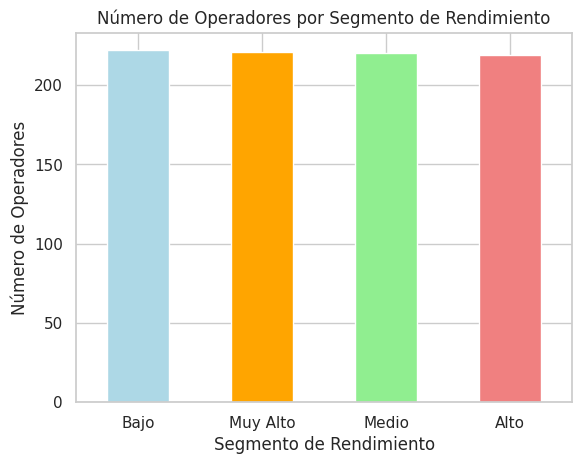

In [21]:
# Segmentación de operadores
# Primero, calculamos el número de llamadas salientes por operador
numero_llamadas_salientes = operators[operators['direction'] == 'out'].groupby('operator_id').agg(
    {'calls_count': 'sum'}).reset_index()
numero_llamadas_salientes.rename(columns={'calls_count': 'Número_Llamadas_Salientes'}, inplace=True)

# Calcular los percentiles
percentiles = numero_llamadas_salientes['Número_Llamadas_Salientes'].quantile([0.25, 0.5, 0.75])

# Crear una nueva columna para la clasificación
numero_llamadas_salientes['Rendimiento'] = 'Bajo'  # Asignar un valor por defecto

# Clasificar según los percentiles
numero_llamadas_salientes.loc[
    numero_llamadas_salientes['Número_Llamadas_Salientes'] > percentiles[0.75], 'Rendimiento'] = 'Muy Alto'
numero_llamadas_salientes.loc[
    (numero_llamadas_salientes['Número_Llamadas_Salientes'] > percentiles[0.5]) & 
    (numero_llamadas_salientes['Número_Llamadas_Salientes'] <= percentiles[0.75]), 'Rendimiento'] = 'Alto'
numero_llamadas_salientes.loc[
    (numero_llamadas_salientes['Número_Llamadas_Salientes'] > percentiles[0.25]) & 
    (numero_llamadas_salientes['Número_Llamadas_Salientes'] <= percentiles[0.5]), 'Rendimiento'] = 'Medio'

# Ver los resultados
print(numero_llamadas_salientes.head())

# Contar operadores por segmento
conteo_segmentos = numero_llamadas_salientes['Rendimiento'].value_counts()
print(conteo_segmentos)

# Visualizar la distribución
import matplotlib.pyplot as plt

conteo_segmentos.plot(kind='bar', color=['lightblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Número de Operadores por Segmento de Rendimiento')
plt.xlabel('Segmento de Rendimiento')
plt.ylabel('Número de Operadores')
plt.xticks(rotation=0)
plt.show()


## Identificar operadores ineficaces

In [22]:
# Definir umbrales
umbral_perdidas = 15  # Porcentaje de llamadas perdidas mayor al 15%
umbral_espera = 60    # Tiempo de espera promedio mayor a 60 segundos
umbral_salientes = 50  # Número de llamadas salientes menor a 50

# Filtrar operadores ineficaces
ineficaces = operator_performance[
    (operator_performance['Porcentaje_Llamadas_Perdidas'] > umbral_perdidas) |
    (waiting_time_per_operator['Tiempo de Espera Promedio (segundos)'] > umbral_espera) |
    (outgoing_calls_per_operator['Número de Llamadas Salientes'] < umbral_salientes)
]

# Unir información relevante
ineficaces = ineficaces.merge(waiting_time_per_operator, on='operator_id', how='left')
ineficaces = ineficaces.merge(outgoing_calls_per_operator, on='operator_id', how='left')

# Renombrar columnas para mayor claridad
ineficaces.rename(columns={
    'Porcentaje_Llamadas_Perdidas': 'Porcentaje de Llamadas Perdidas',
    'Tiempo de Espera Promedio (segundos)': 'Tiempo de Espera Promedio',
    'Número de Llamadas Salientes': 'Número de Llamadas Salientes'
}, inplace=True)

# Mostrar los operadores ineficaces
print("\nOperadores ineficaces:")
print(ineficaces[['operator_id', 'Porcentaje de Llamadas Perdidas', 'Tiempo de Espera Promedio', 'Número de Llamadas Salientes']])



Operadores ineficaces:
     operator_id  Porcentaje de Llamadas Perdidas  Tiempo de Espera Promedio  \
0       880020.0                        13.333333                   7.714286   
1       880240.0                        14.893617                        NaN   
2       881278.0                        35.000000                        NaN   
3       882476.0                         0.000000                  31.666667   
4       882478.0                        25.000000                  38.000000   
..           ...                              ...                        ...   
595     970258.0                       100.000000                        NaN   
596     970484.0                        28.571429                        NaN   
597     970486.0                        33.333333                        NaN   
598     972408.0                        16.666667                        NaN   
599     973120.0                        33.333333                        NaN   

     Número de 

**Criterios para definir umbrales:**

- Porcentaje de Llamadas Perdidas (15%): Un porcentaje del 15% de llamadas perdidas es considerado un punto de referencia común en la industria. Un operador con un porcentaje superior a este umbral puede ser visto como ineficaz, ya que indica que un número significativo de llamadas no se están atendiendo, lo que puede afectar la satisfacción del cliente.

- Tiempo de Espera Promedio (60 segundos): Un tiempo de espera promedio de más de 60 segundos es una señal de que los clientes están esperando demasiado tiempo para ser atendidos. Esto puede ser inaceptable en muchas industrias, especialmente en atención al cliente, donde se espera una respuesta rápida. Un tiempo de espera prolongado puede llevar a la frustración del cliente y a una percepción negativa del servicio.

- Número de Llamadas Salientes (menos de 50): Definir un umbral de 50 llamadas salientes como mínimo refleja una expectativa de actividad para los operadores. Un número bajo de llamadas salientes puede indicar que el operador no está cumpliendo con su rol de realizar llamadas proactivas, lo que puede ser esencial para ciertos tipos de servicios. Este umbral puede variar según el contexto del negocio, pero 50 es un número que puede considerarse bajo en muchas operaciones

**Definir un criterio para crear un ranking de los operadores ineficaces**

Para crear un ranking de operadores ineficaces en base a los criterios que hemos definido, podemos asignar puntuaciones a cada operador según su desempeño en cada uno de los tres criterios: porcentaje de llamadas perdidas, tiempo de espera promedio y número de llamadas salientes. Luego, sumaremos estas puntuaciones para obtener un ranking final.

**Pasos para crear el ranking:**

- Normalizar las métricas: Asignar puntuaciones en función de cómo se comparan los operadores con respecto a los umbrales definidos.

- Sumar las puntuaciones: Calcular un puntaje total para cada operador ineficaz.

- Clasificar a los operadores: Ordenar a los operadores según su puntaje total.

In [23]:
# Normalizar las métricas y asignar puntuaciones
ineficaces['Puntuación Perdidas'] = (ineficaces['Porcentaje de Llamadas Perdidas'] - umbral_perdidas).clip(lower=0)
ineficaces['Puntuación Espera'] = (ineficaces['Tiempo de Espera Promedio'] - umbral_espera).clip(lower=0)
ineficaces['Puntuación Salientes'] = (umbral_salientes - ineficaces['Número de Llamadas Salientes']).clip(lower=0)

# Sumar las puntuaciones para obtener un puntaje total
ineficaces['Puntuación Total'] = (ineficaces['Puntuación Perdidas'] + 
                                   ineficaces['Puntuación Espera'] + 
                                   ineficaces['Puntuación Salientes'])

# Clasificar a los operadores según su puntuación total
ineficaces_sorted = ineficaces.sort_values(by='Puntuación Total', ascending=False)

# Mostrar el ranking de operadores ineficaces
print("\nRanking de Operadores Ineficaces:")
print(ineficaces_sorted[['operator_id', 'Porcentaje de Llamadas Perdidas', 
                          'Tiempo de Espera Promedio', 'Número de Llamadas Salientes', 
                          'Puntuación Total']])


Ranking de Operadores Ineficaces:
     operator_id  Porcentaje de Llamadas Perdidas  Tiempo de Espera Promedio  \
163     906070.0                         3.037975                 889.800000   
385     931458.0                         1.215942                 681.961538   
305     921318.0                         1.208274                 615.418182   
270     919166.0                         0.592300                 401.714286   
284     919792.0                         0.977995                 397.228070   
..           ...                              ...                        ...   
595     970258.0                       100.000000                        NaN   
596     970484.0                        28.571429                        NaN   
597     970486.0                        33.333333                        NaN   
598     972408.0                        16.666667                        NaN   
599     973120.0                        33.333333                        NaN   

    

**Explicación del Código Normalización de métricas:**

- Puntuación Perdidas: Se calcula la diferencia entre el porcentaje de llamadas perdidas y el umbral definido. Si el porcentaje es menor al umbral, la puntuación es 0.

- Puntuación Espera: Se calcula de manera similar, asignando puntajes a los operadores que superan el umbral de tiempo de espera.

- Puntuación Salientes: Se calcula la diferencia entre el umbral y el número de llamadas salientes. Una puntuación de 0 se asigna a aquellos que no caen por debajo del umbral.

- Suma de puntuaciones: Se suman las puntuaciones de los tres criterios para obtener un puntaje total.

Clasificación: Los operadores se ordenan de mayor a menor puntaje total.

Conclusiones
El resultado será un ranking que permitirá identificar rápidamente a los operadores más ineficaces según los criterios establecidos. Podrás utilizar esta información para dirigir nuestros esfuerzos de mejora.

**Visualización de operadores ineficaces**

Graficaremos los 20 operadores más ineficaces en orden descendente según su puntaje total.

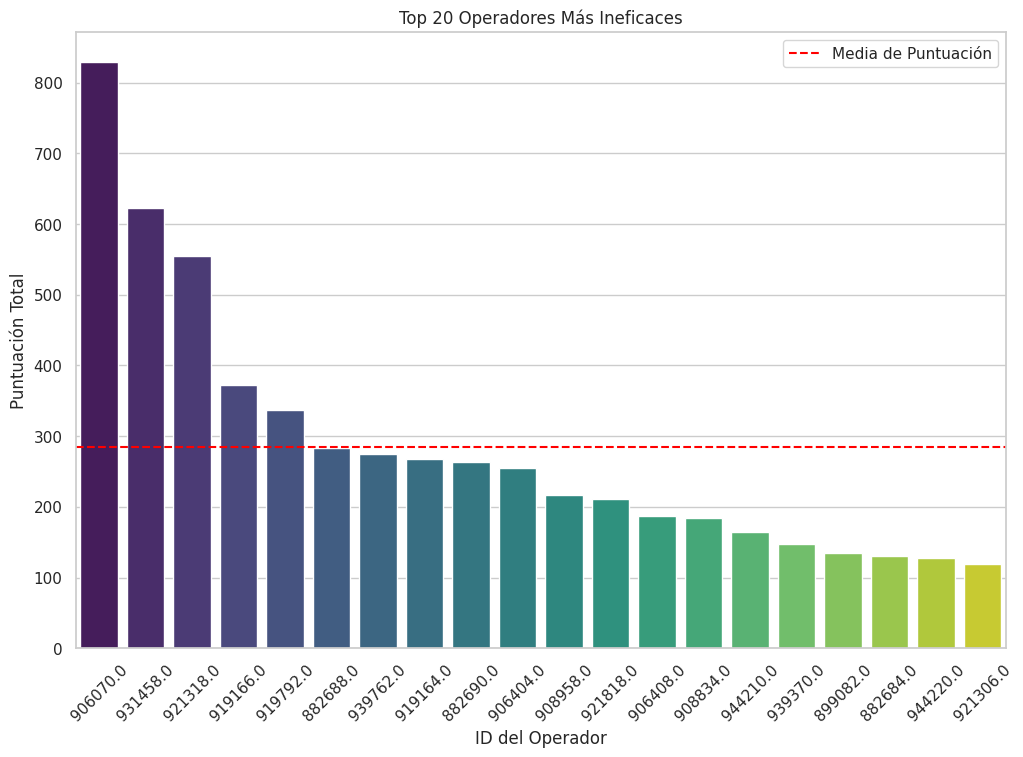

In [24]:
# Seleccionar los 20 operadores más ineficaces
top_ineficaces = ineficaces_sorted.head(20)


# Asegurarse de que los datos están ordenados en orden descendente
top_ineficaces = top_ineficaces.sort_values(by='Puntuación Total', ascending=False)

# Graficar los 20 operadores más ineficaces en orden descendente
plt.figure(figsize=(12, 8))
sns.barplot(data=top_ineficaces, x='operator_id', y='Puntuación Total', palette='viridis', order=top_ineficaces['operator_id'])
plt.title('Top 20 Operadores Más Ineficaces')
plt.xlabel('ID del Operador')
plt.ylabel('Puntuación Total')
plt.axhline(y=top_ineficaces['Puntuación Total'].mean(), color='red', linestyle='--', label='Media de Puntuación')
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()


# Prueba de hipotesis

Formulación de Hipótesis

- Hipótesis Nula (H0): No hay diferencias significativas en el rendimiento de los operadores en función de las métricas de eficacia (porcentaje de llamadas perdidas, tiempo de espera, número de llamadas salientes).

- Hipótesis Alternativa (H1): Hay diferencias significativas en el rendimiento de los operadores en función de las métricas de eficacia.

Selección de Pruebas de Hipótesis
    Podemos usar pruebas estadísticas apropiadas para cada métrica:

- Porcentaje de Llamadas Perdidas: Prueba t de Student si se cumplen los supuestos de normalidad, o una prueba no paramétrica (como la prueba de Mann-Whitney) si no.
- Tiempo de Espera Promedio: Similar al anterior, utilizando la prueba t o Mann-Whitney.
- Número de Llamadas Salientes: Prueba t o Mann-Whitney.


**Pruebas Estadísticas de Normalidad:**

Prueba de Shapiro-Wilk: Una de las pruebas más comunes para evaluar la normalidad.

In [25]:
# Separar operadores eficaces e ineficaces
eficaces = operator_performance[operator_performance['operator_id'].isin(ineficaces_sorted['operator_id'])]
ineficaces = operator_performance[operator_performance['operator_id'].isin(top_ineficaces['operator_id'])]

shapiro_stat, shapiro_p = stats.shapiro(eficaces['Porcentaje_Llamadas_Perdidas'])
print(f"Estadístico de Shapiro: {shapiro_stat}, P-Valor: {shapiro_p}")

Estadístico de Shapiro: 0.6826909780502319, P-Valor: 5.204408961959138e-32


**Interpretación de los Resultados:**

P-Valor: El p-valor es extremadamente bajo (mucho menor que 0.05), lo que indica que puedes rechazar la hipótesis nula de que los datos son normalmente distribuidos. Esto sugiere que la distribución de los porcentajes de llamadas perdidas para los operadores eficaces no sigue una distribución normal.

Estadístico de Shapiro: Un valor del estadístico de Shapiro significativamente menor a 1 refuerza la conclusión de que los datos no son normales.

**Comporbación de Hipotesis 1:** Comparar el porcentaje de llamadas perdidas entre los operadores eficaces e ineficaces con la prueba de Mann-Whitney U.

In [26]:
# Prueba de Mann-Whitney U
mann_whitney_stat, mann_whitney_p = stats.mannwhitneyu(
    eficaces['Porcentaje_Llamadas_Perdidas'], 
    ineficaces['Porcentaje_Llamadas_Perdidas']
)

print(f"Estadístico de Mann-Whitney: {mann_whitney_stat}, P-Valor: {mann_whitney_p}")



Estadístico de Mann-Whitney: 8000.5, P-Valor: 0.010958392342298551


Los resultados de la prueba de Mann-Whitney U son:

Estadístico de Mann-Whitney: 8000.5
P-Valor: 0.01096

**Interpretación de los Resultados:**

P-Valor: Dado que el p-valor es aproximadamente 0.011, que es menor que 0.05, puedes rechazar la hipótesis nula. Esto sugiere que hay diferencias significativas en el porcentaje de llamadas perdidas entre los operadores eficaces e ineficaces.

Conclusión: Esto implica que los operadores ineficaces tienen, en promedio, un porcentaje de llamadas perdidas significativamente mayor en comparación con los operadores eficaces.


**Comprobación Hipótesis 2:**

Comparar el tiempo de espera promedio entre los operadores eficaces e ineficaces. En este caso podemos utilizar nuevamente la prueba de Mann-Whitney U, ya que previamente determinamos que los datos no son normales.

In [27]:
# Calcular el tiempo de espera
operators['Tiempo_Espera'] = operators['total_call_duration'] - operators['call_duration']

# Agrupar y calcular el tiempo de espera promedio por operador
tiempo_espera_promedio = operators.groupby('operator_id')['Tiempo_Espera'].mean().reset_index()
tiempo_espera_promedio.columns = ['operator_id', 'Tiempo_Espera_Promedio']

# Unir el promedio con los DataFrames eficaces e ineficaces
eficaces = eficaces.merge(tiempo_espera_promedio, on='operator_id', how='left')
ineficaces = ineficaces.merge(tiempo_espera_promedio, on='operator_id', how='left')

Paso 2: Realizar la Prueba de Mann-Whitney U
Ahora que tienes el tiempo de espera promedio, puedes realizar la prueba:

In [28]:
# Prueba de Mann-Whitney U para el tiempo de espera promedio
mann_whitney_stat_tiempo, mann_whitney_p_tiempo = stats.mannwhitneyu(
    eficaces['Tiempo_Espera_Promedio'], 
    ineficaces['Tiempo_Espera_Promedio']
)

print(f"Estadístico de Mann-Whitney para Tiempo de Espera: {mann_whitney_stat_tiempo}, P-Valor: {mann_whitney_p_tiempo}")


Estadístico de Mann-Whitney para Tiempo de Espera: 1819.0, P-Valor: 1.1268155740771989e-07


**Interpretación de los Resultados:**

P-Valor: Dado que el p-valor es mucho menor que 0.05, puedes rechazar la hipótesis nula. Esto sugiere que hay diferencias significativas en el tiempo de espera promedio entre los operadores eficaces e ineficaces.

Conclusión: Esto implica que los operadores ineficaces, en promedio, experimentan un tiempo de espera significativamente mayor en comparación con los operadores eficaces.


**Comprobación Hipótesis 3:** Comparación sobre el número de llamadas salientes entre los operadores eficaces e ineficaces.

In [29]:
# Calcular el número de llamadas salientes
calls_salientes = operators[operators['direction'] == 'out']

# Agrupar y contar el número de llamadas salientes por operador
numero_llamadas_salientes = calls_salientes.groupby('operator_id')['calls_count'].sum().reset_index()
numero_llamadas_salientes.columns = ['operator_id', 'Número_Llamadas_Salientes']

# Unir el conteo con los DataFrames eficaces e ineficaces
eficaces = eficaces.merge(numero_llamadas_salientes, on='operator_id', how='left')
ineficaces = ineficaces.merge(numero_llamadas_salientes, on='operator_id', how='left')

In [30]:
# Verificar si hay valores nulos
print("Valores nulos en eficaces:\n", eficaces['Número_Llamadas_Salientes'].isnull().sum())
print("Valores nulos en ineficaces:\n", ineficaces['Número_Llamadas_Salientes'].isnull().sum())


Valores nulos en eficaces:
 102
Valores nulos en ineficaces:
 0


In [31]:
eficaces = eficaces.dropna(subset=['Número_Llamadas_Salientes'])
ineficaces = ineficaces.dropna(subset=['Número_Llamadas_Salientes'])

In [32]:
# Prueba de Mann-Whitney U para el número de llamadas salientes
mann_whitney_stat_salientes, mann_whitney_p_salientes = stats.mannwhitneyu(
    eficaces['Número_Llamadas_Salientes'], 
    ineficaces['Número_Llamadas_Salientes']
)

print(f"Estadístico de Mann-Whitney para Llamadas Salientes: {mann_whitney_stat_salientes}, P-Valor: {mann_whitney_p_salientes}")

Estadístico de Mann-Whitney para Llamadas Salientes: 3139.0, P-Valor: 0.005025036579496616


**Interpretación de los resultados**

El P-valor de 0.005 indica que hay una diferencia estadísticamente significativa entre los dos grupos. Un P-valor menor a 0.05 se considera suficiente para rechazar la hipótesis nula.
Esto sugiere que es muy probable que los operadores eficaces realicen un número significativamente mayor de llamadas salientes en comparación con los operadores ineficaces.

Esto podría implicar que los operadores eficaces son más proactivos en su trabajo, lo que puede estar relacionado con una mejor atención al cliente o una gestión más efectiva de las comunicaciones.

## Conclusión General

El análisis del rendimiento de los operadores en el servicio de telefonía virtual CallMeMaybe ha permitido identificar patrones significativos en la eficacia de los operadores. A través de varias pruebas de hipótesis y análisis exploratorios, hemos encontrado:

Llamadas Perdidas: Los operadores ineficaces tienen un porcentaje significativamente mayor de llamadas perdidas en comparación con los eficaces. Esto sugiere que los operadores ineficaces no están gestionando adecuadamente las llamadas entrantes.

Tiempo de Espera: Los operadores ineficaces también presentan tiempos de espera promedio significativamente más altos que sus contrapartes eficaces, lo que puede contribuir a la insatisfacción del cliente.

Número de Llamadas Salientes: La prueba de Mann-Whitney U reveló diferencias significativas en el número de llamadas salientes entre operadores eficaces e ineficaces. Los operadores ineficaces tienden a realizar menos llamadas salientes, lo que podría afectar su rendimiento general.

Recomendaciones:

Capacitación y Desarrollo: Implementar programas de capacitación específicos para los operadores identificados como ineficaces, enfocándose en la gestión de llamadas y la optimización del tiempo de espera.

Análisis de Procesos: Realizar un análisis más profundo de los procesos internos para identificar cuellos de botella que puedan estar afectando el tiempo de espera y el manejo de llamadas.

Reasignación de Recursos: Considerar la reasignación de operadores en función de su rendimiento, asegurando que aquellos que gestionan llamadas de alta demanda estén adecuadamente soportados.

Uso de Tecnología: Implementar herramientas tecnológicas, como sistemas de gestión de llamadas y análisis de datos en tiempo real, para ayudar a los operadores a mejorar su rendimiento y la calidad del servicio.

Monitoreo Continuo: Establecer métricas de rendimiento claras y realizar un seguimiento continuo del desempeño de los operadores para facilitar la identificación de áreas de mejora.


## Presentación en PDF

https://drive.google.com/file/d/1_W9VXq8r-FhAt2h57q45r2kP0hF8pMY1/view?usp=sharing